正在种树...
🌲 单棵决策树验证集准确率: 79.89%


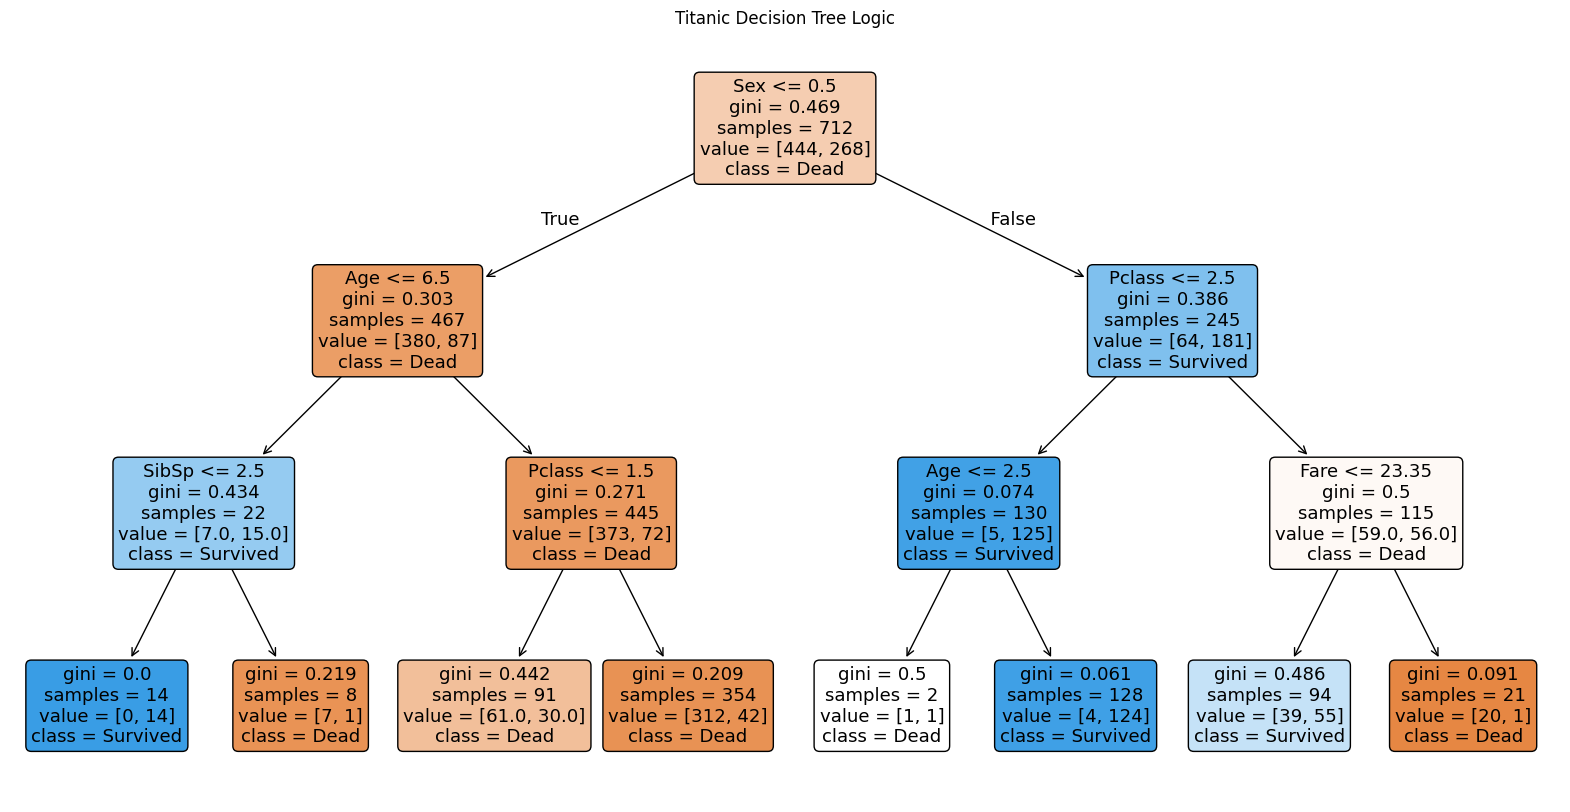


正在植树造林...
🌲🌲🌲 随机森林验证集准确率: 81.01%

=== 随机森林眼里的重要性 ===
Sex         0.460344
Fare        0.163397
Pclass      0.141307
Age         0.108188
SibSp       0.056297
Parch       0.040078
Embarked    0.030388
dtype: float64

🎉 文件已生成: rf_submission.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. 偷个懒，直接复制之前的预处理代码 (SOP)
def preprocess_data(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Fare'] = df['Fare'].fillna(df['Fare'].median()) # 记得加上这个！
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
    return df

# 2. 读取并清洗数据
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')
test_ids = test_df['PassengerId'] # 备份ID

train_clean = preprocess_data(train_df)
test_clean = preprocess_data(test_df)

X = train_clean.drop('Survived', axis=1)
y = train_clean['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# 第一战：单棵决策树 (Decision Tree)
# ==========================================
print("正在种树...")
# max_depth=3 限制树的深度，防止它太复杂（过拟合）
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# 看看准确率
tree_acc = accuracy_score(y_val, tree_model.predict(X_val))
print(f"🌲 单棵决策树验证集准确率: {tree_acc:.2%}")

# --- 高能环节：把树画出来！---
plt.figure(figsize=(20, 10))
plot_tree(tree_model, 
          feature_names=X.columns,  
          class_names=['Dead', 'Survived'], 
          filled=True, 
          rounded=True)
plt.title("Titanic Decision Tree Logic")
plt.show()

# ==========================================
# 第二战：随机森林 (Random Forest)
# ==========================================
print("\n正在植树造林...")
# n_estimators=100 表示种100棵树，大家投票决定
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

rf_acc = accuracy_score(y_val, rf_model.predict(X_val))
print(f"🌲🌲🌲 随机森林验证集准确率: {rf_acc:.2%}")

# 看看随机森林觉得谁重要？
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n=== 随机森林眼里的重要性 ===")
print(importances)

# ==========================================
# 生成提交文件
# ==========================================
final_predictions = rf_model.predict(test_clean)
submission = pd.DataFrame({'PassengerId': test_ids, 'Survived': final_predictions})
submission.to_csv('rf_submission.csv', index=False)
print("\n🎉 文件已生成: rf_submission.csv")